# Films Data Analysis Using Python

#  Importing Libraries

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sn
import os
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import datetime

# Importing the Dataset

In [170]:
df_data = pd.read_csv("C:/Users/Admin/Desktop/imdb3.csv",engine ='python',encoding = "ISO-8859-1")
df_data.head(5)

,year,month,language,movie_name,genre,result,imdb_rating
0,2021,january,Kannada,Rajatantra,drama,average,NaN
1,2021,january,Kannada,Amruthavahini,drama,flop,NaN
2,2021,january,Kannada,Mahishasura,drama,average,8.6
3,2021,january,Kannada,Vikky,drama,flop,NaN
4,2021,january,Kannada,kathle kaadu,drama,flop,NaN


In [171]:
df_data.tail()

,year,month,language,movie_name,genre,result,imdb_rating
643,2021,december,Hindi,420 IPC,crime,flop,6.5
644,2021,december,Hindi,83,biography,Blockbuster,7.5
645,2021,december,Hindi,Atrangi Re,comedy,average,6.5
646,2021,december,Hindi,Murder at Teesri Manzil 302,thriller,flop,4.3
647,2021,december,Hindi,Waah Zindagi,drama,average,7.3


# Checking the Dimensions of Data

In [172]:
df_data.shape

(648, 7)

<h5> the above dataset has 648 rows and 7 columns</h5>

# Checking the Columns

In [173]:
df_data.columns.unique()

Index(['year', 'month', 'language', 'movie_name', 'genre', 'result',
       'imdb_rating'],
      dtype='object')

# Checking different language films

In [174]:
df_data.language.unique()

array(['Kannada', 'Telugu', 'Tamil', 'Malayalam', 'Hindi'], dtype=object)

In [ ]:
#  The above dataset has 5 different language movies data

# Checking different Genre

In [175]:
df_data.genre.unique()

array(['drama', 'comedy', 'action', 'crime', 'thriller', 'horror',
       'romance', 'sports', 'history', 'family', 'biography'],
      dtype=object)

In [55]:
# The above dataset has 11 different genre movies

# Checking Total movies in each languages 

In [176]:
df_data.language.value_counts()

Tamil        185
Malayalam    155
Telugu       113
Hindi        101
Kannada       94
Name: language, dtype: int64

# Checking Total movies in each Genre

In [218]:
df_data.genre.value_counts()

drama        205
thriller      90
action        79
comedy        78
romance       63
crime         56
horror        39
family        16
sports        12
biography      9
history        1
Name: genre, dtype: int64

# Checking Total number of null values

In [177]:
df_data.isnull().sum()

year             0
month            0
language         0
movie_name       0
genre            0
result           0
imdb_rating    143
dtype: int64

In [91]:
# There are total of 143 null values in imdb_rating column

# Data cleaning 

In [92]:
# Filling the null values

In [178]:
df_data['imdb_rating'].fillna(0,inplace=True)

In [179]:
df_data.head()

,year,month,language,movie_name,genre,result,imdb_rating
0,2021,january,Kannada,Rajatantra,drama,average,0.0
1,2021,january,Kannada,Amruthavahini,drama,flop,0.0
2,2021,january,Kannada,Mahishasura,drama,average,8.6
3,2021,january,Kannada,Vikky,drama,flop,0.0
4,2021,january,Kannada,kathle kaadu,drama,flop,0.0


# Number of unique values in each column

In [180]:
df_data.nunique()

year             1
month           12
language         5
movie_name     646
genre           11
result           4
imdb_rating     71
dtype: int64

# Data types in the dataset

In [181]:
df_data.dtypes

year             int64
month           object
language        object
movie_name      object
genre           object
result          object
imdb_rating    float64
dtype: object

# Checking different result

In [182]:
df_data.result.unique()

array(['average', 'flop', 'hit', 'Blockbuster'], dtype=object)

# Summary of Data

In [183]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         648 non-null    int64  
 1   month        648 non-null    object 
 2   language     648 non-null    object 
 3   movie_name   648 non-null    object 
 4   genre        648 non-null    object 
 5   result       648 non-null    object 
 6   imdb_rating  648 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 35.6+ KB


In [184]:
df_data.year.astype(str)


0      2021
1      2021
2      2021
3      2021
4      2021
       ... 
643    2021
644    2021
645    2021
646    2021
647    2021
Name: year, Length: 648, dtype: object

# Statistical summary of Data

In [187]:
df_data.describe().drop('year',axis=1)

,imdb_rating
count,648.000000
mean,5.014352
std,2.969848
min,0.000000
25%,3.675000
50%,5.900000
75%,7.200000
max,9.600000


# Number of duplictate values

In [158]:
df_data.duplicated().sum()

0

In [ ]:
#There is no duplicted value in this dataset

# Corelation between columns

In [188]:
df_data.corr()

,year,imdb_rating
year,NaN,NaN
imdb_rating,NaN,1.0


# Covariance between columns

In [189]:
df_data.cov()

,year,imdb_rating
year,0.0,0.000000
imdb_rating,0.0,8.819995


# Slicing of data

In [194]:
df_data.iloc[0]

year                 2021
month             january
language          Kannada
movie_name     Rajatantra
genre               drama
result            average
imdb_rating           0.0
Name: 0, dtype: object

# Count of Movies based on result by each language

In [239]:
print(df_data.groupby('language')['result'].value_counts().to_frame('counts'))

                       counts
language  result             
Hindi     flop             52
          average          30
          hit              15
          Blockbuster       4
Kannada   flop             44
          average          34
          hit              12
          Blockbuster       4
Malayalam flop             82
          average          47
          hit              22
          Blockbuster       4
Tamil     flop             98
          average          62
          hit              18
          Blockbuster       7
Telugu    average          53
          flop             43
          hit               9
          Blockbuster       8


# Count of Movies based on result by each genre

In [240]:
print(df_data.groupby('genre')['result'].value_counts().to_frame('counts'))

                       counts
genre     result             
action    average          29
          flop             29
          Blockbuster      11
          hit              10
biography flop              5
          Blockbuster       2
          average           1
          hit               1
comedy    average          38
          flop             26
          hit              13
          Blockbuster       1
crime     average          22
          flop             19
          hit               9
          Blockbuster       6
drama     flop            129
          average          60
          hit              16
family    flop             10
          average           4
          hit               2
history   flop              1
horror    flop             23
          average          12
          hit               4
romance   flop             35
          average          20
          hit               5
          Blockbuster       3
sports    flop              5
          

# Monthly Count of Movies  by each language

In [241]:
print(df_data.groupby('month')['language'].value_counts().to_frame('counts'))

                     counts
month     language         
april     Malayalam      18
          Tamil          13
          Hindi           9
          Kannada         4
          Telugu          4
august    Telugu         12
          Malayalam      11
          Hindi           7
          Kannada         5
          Tamil           5
december  Tamil          37
          Malayalam      24
          Hindi          10
          Telugu         10
          Kannada         9
february  Tamil          25
          Kannada        17
          Malayalam      13
          Telugu         13
          Hindi           6
january   Tamil          16
          Telugu         14
          Hindi          12
          Kannada        10
          Malayalam       8
july      Malayalam      14
          Hindi           7
          Tamil           4
          Telugu          3
          Kannada         1
june      Malayalam      11
          Hindi           3
          Tamil           3
          Telugu    

# Visualization of data


# Pie Plot for Total movies in each languages

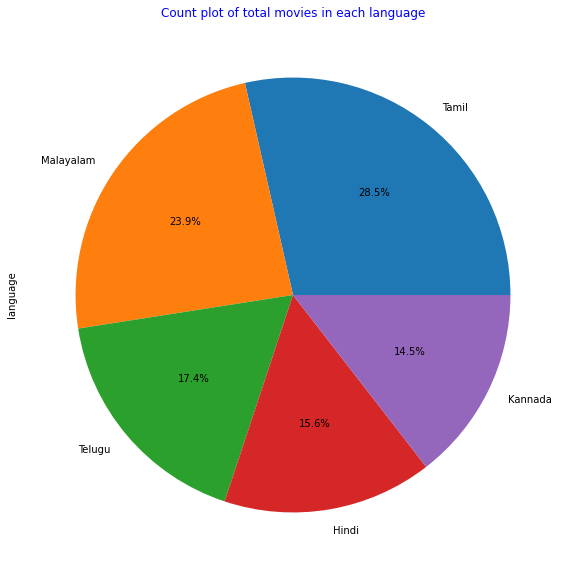

In [276]:
plt.figure(figsize=(12,10))
df_data["language"].value_counts().plot.pie(subplots="True",autopct ="%1.1f%%")
plt.title("Count plot of total movies in each language",color='blue')
plt.show()

# Count plot of Genre

drama        205
thriller      90
action        79
comedy        78
romance       63
crime         56
horror        39
family        16
sports        12
biography      9
history        1
Name: genre, dtype: int64


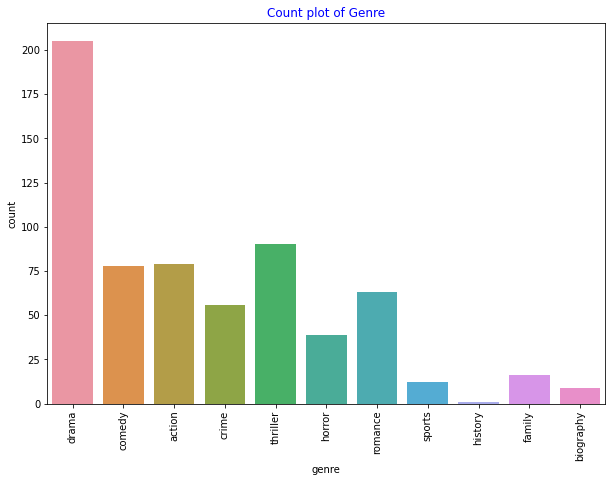

In [244]:
print(df_data["genre"].value_counts())
plt.figure(figsize=(10,7))
plt.title("Count plot of Genre",color='blue')
sn.countplot(x =df_data["genre"])
plt.xticks(rotation= 90)
plt.show()

# Count plot of Movies by Month

december     90
march        81
february     74
october      69
november     66
january      60
september    53
april        48
august       40
july         29
may          19
june         19
Name: month, dtype: int64


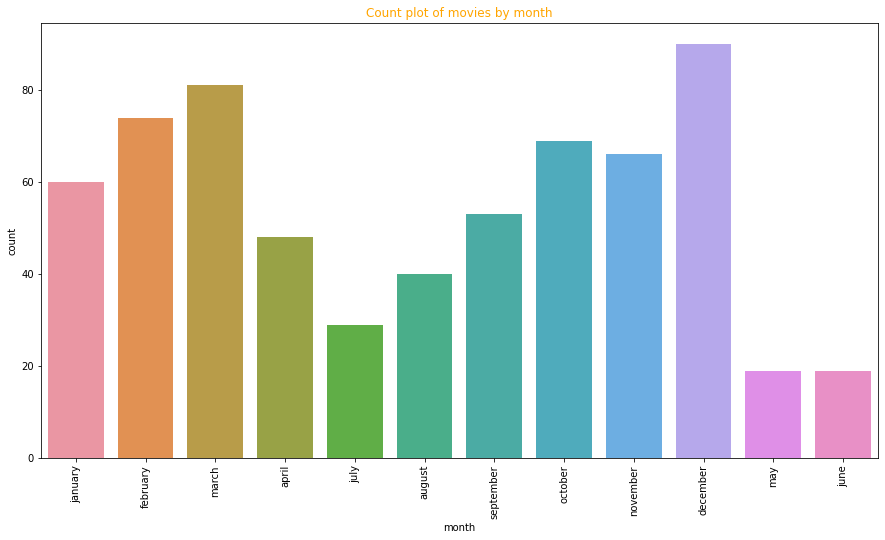

In [245]:
print(df_data["month"].value_counts())
plt.figure(figsize=(15,8))
plt.title("Count plot of movies by month",color ='orange')
sn.countplot(x =df_data["month"])
plt.xticks(rotation= 90)
plt.show()

# Movie count based on result

flop           319
average        226
hit             76
Blockbuster     27
Name: result, dtype: int64


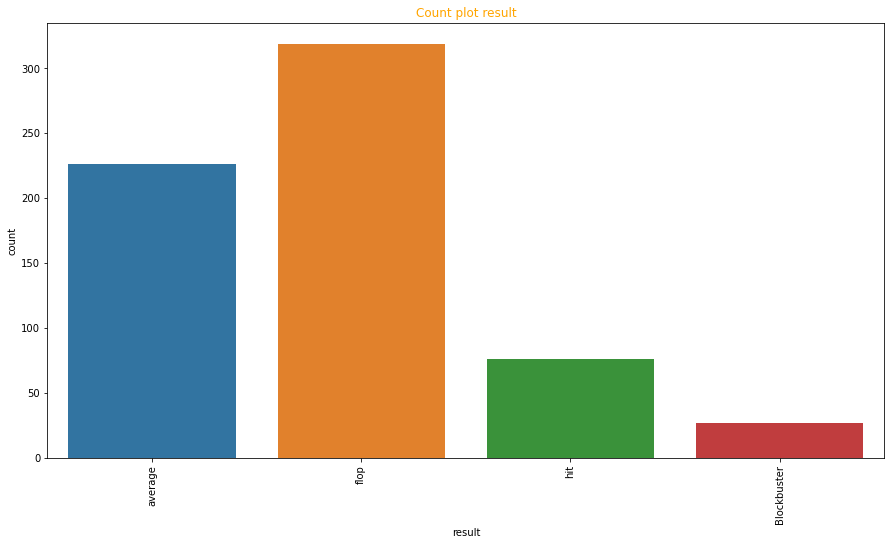

In [250]:
print(df_data["result"].value_counts())
plt.figure(figsize=(15,8))
plt.title("Count plot result",color ='orange')
sn.countplot(x =df_data["result"])
plt.xticks(rotation= 90)
plt.show()

# Average IMDB rating for each genre

genre
action       5.213924
biography    6.600000
comedy       6.221795
crime        5.826786
drama        3.836098
family       4.256250
history      7.800000
horror       5.261538
romance      5.088889
sports       5.708333
thriller     5.664444
Name: imdb_rating, dtype: float64


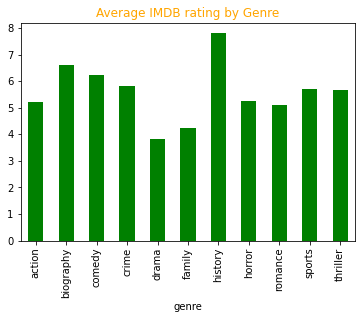

<Figure size 720x504 with 0 Axes>

In [253]:
print(df_data.groupby('genre')['imdb_rating'].mean())
df_data.groupby('genre')['imdb_rating'].mean().plot.bar(color = 'green')
plt.title("Average IMDB rating by Genre",color='orange')
plt.figure(figsize=(10,7))
plt.show()

# Average IMDB rating based on result

result
Blockbuster    7.162963
average        6.542920
flop           3.245768
hit            7.128947
Name: imdb_rating, dtype: float64


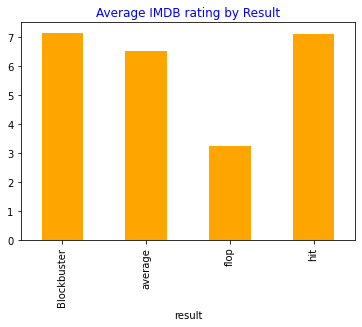

<Figure size 720x504 with 0 Axes>

In [254]:
print(df_data.groupby('result')['imdb_rating'].mean())
df_data.groupby('result')['imdb_rating'].mean().plot.bar(color = 'orange')
plt.title("Average IMDB rating by Result",color='blue')
plt.figure(figsize=(10,7))
plt.show()

# Histogram of Data

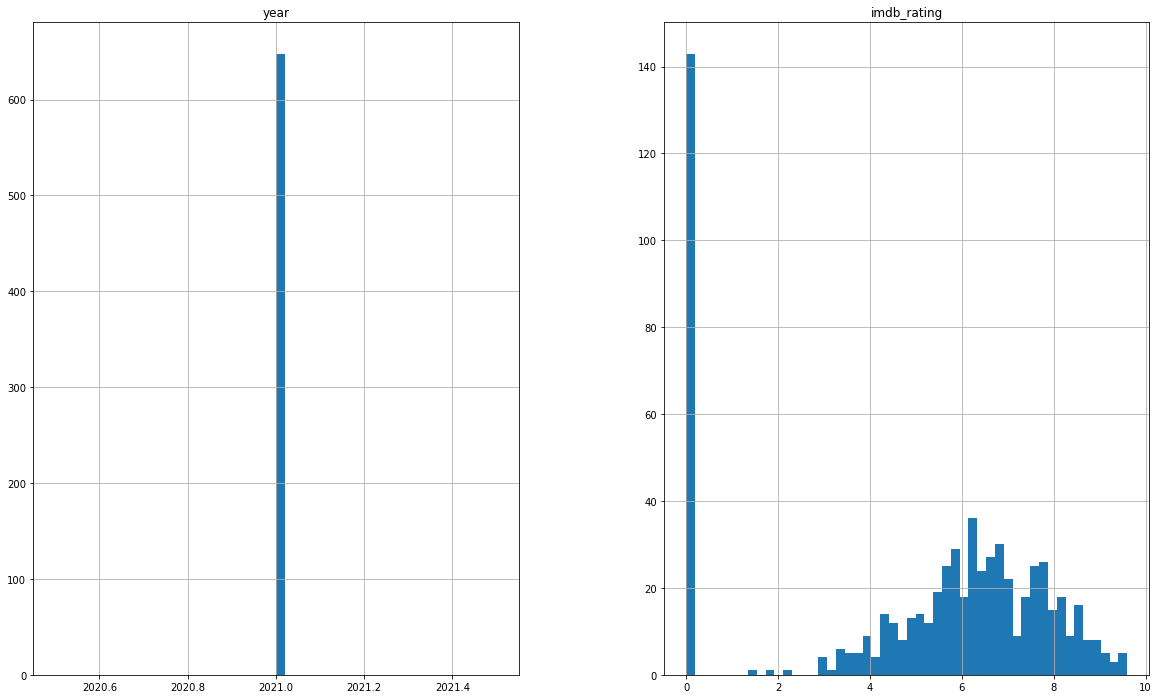

In [257]:
df_data.hist(bins =50,figsize=(20,12))
plt.show()

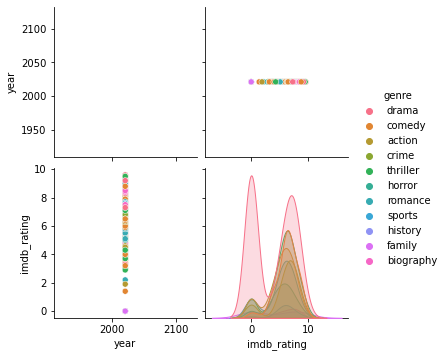

In [258]:
figsize=(10,7)
sn.pairplot(df_data,hue="genre")

# Highest IMDB ratings

In [267]:
df1 = pd.DataFrame(df_data.imdb_rating.nlargest())
df1

,imdb_rating
27,9.6
85,9.6
381,9.6
506,9.5
528,9.5


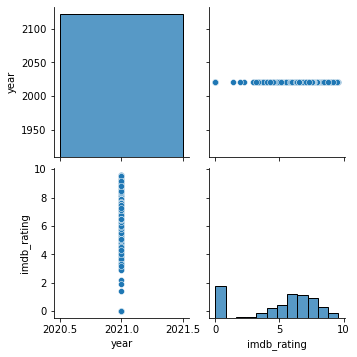

In [268]:
sn.pairplot(df_data)

# Summarized Data

In [272]:
df2 = pd.DataFrame(df_data.groupby(['month','language','movie_name','genre','result'])['imdb_rating'].sum().reset_index())
df2

,month,language,movie_name,genre,result,imdb_rating
0,april,Hindi,99 Songs,romance,flop,6.3
1,april,Hindi,Aa Bhi Ja O Piya,family,flop,0.0
2,april,Hindi,Ajeeb Daastaan,romance,average,6.7
3,april,Hindi,Bansuri: The Flute,drama,flop,3.3
4,april,Hindi,Flight,thriller,flop,5.8
...,...,...,...,...,...,...
643,september,Telugu,Maro Prastanam,crime,average,8.1
644,september,Telugu,Net,thriller,average,5.6
645,september,Telugu,Nootokka Zillala Andagaadu,comedy,average,6.4
646,september,Telugu,Seetimaar,action,hit,5.1


# Statistical summary

In [275]:
df_data.groupby("genre").imdb_rating.agg(["mean","median","min","max","count","std","var"])

,mean,median,min,max,count,std,var
genre,,,,,,,
action,5.213924,5.70,0.0,9.5,79,2.478923,6.145060
biography,6.600000,7.00,3.9,8.5,9,1.586663,2.517500
comedy,6.221795,6.40,0.0,9.4,78,1.903970,3.625103
crime,5.826786,6.60,0.0,9.2,56,2.604087,6.781269
drama,3.836098,5.10,0.0,9.6,205,3.542939,12.552416
family,4.256250,5.30,0.0,9.0,16,4.031372,16.251958
history,7.800000,7.80,7.8,7.8,1,NaN,NaN
horror,5.261538,5.90,0.0,8.8,39,2.312849,5.349271
romance,5.088889,5.70,0.0,9.3,63,2.663681,7.095197
